# Imports

In [1]:
# General modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import sep
from tqdm import tqdm

# Enable re-load of local modules every time they are called
%load_ext autoreload
%autoreload 2
%aimport numpy 
%aimport pandas

# Load data

## Teacher data

In [6]:
home_folder = 'Documents{0}CEGIS{0}DiscSim'.format(sep)
filename = 'ee_data.csv'

teacher_data = pd.read_csv(filename) # Read data from the excel sheet
teacher_variables = teacher_data.columns       # Each column is a single variable measured, this gives the names of columns
teacher_n_variables = len(teacher_variables)
teacher_n_rows = len(teacher_data[teacher_variables[0]])

print('The following variables were found in this dataset:')
for v in teacher_variables:
    print('    {0}'.format(v))

The following variables were found in this dataset:
    identifier
    student_id
    Subject
    1st question Level
    1st level score
    2nd question Level
    2nd level score
    3rd question Level
    3rd level score
    Cluster ID
    School ID
    district
    Teacher User ID
    class
    baseline
    Student Identifier


## Supervisor data

In [7]:
home_folder = 'Documents{0}CEGIS{0}DiscSim'.format(sep)
filename = 'ee_ees_data.csv'.format(home_folder, sep)

sup_data = pd.read_csv(filename) # Read data from the excel sheet
sup_variables = sup_data.columns       # Each column is a single variable measured, this gives the names of columns
sup_n_variables = len(sup_variables)
sup_n_rows = len(sup_data[sup_variables[0]])

print('The following variables were found in this dataset:')
for v in sup_variables:
    print('    {0}'.format(v))

The following variables were found in this dataset:
    UID
    district
    block id
    cluster id
    Student Identifier
    school id
    subject
    class
    baseline
    1st question Level
    1st level score
    2nd question Level
    2nd level score
    3rd question Level
    3rd level score
    Admin User ID


# Calculate discrepancy

## Select all samples for a given teacher

1920 teacher IDs found


100%|███████████████████████████████████████| 1920/1920 [00:54<00:00, 35.26it/s]


Text(0, 0.5, 'Number of teachers')

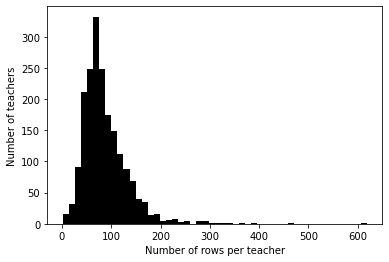

In [8]:
teacher_ids = list(np.unique(list(teacher_data['Teacher User ID'])))
n_teachers = len(teacher_ids)
print('{0} teacher IDs found'.format(n_teachers))

row_nos_per_teacher = {}
n_rows_per_teacher = np.empty(n_teachers, dtype = int)

i = 0
for teacher_id in tqdm(teacher_ids):
    row_nos_per_teacher[teacher_id] = np.where(list(teacher_data['Teacher User ID']) == teacher_id)[0]
    n_rows_per_teacher[i] = len(row_nos_per_teacher[teacher_id])
    i += 1

#n_rows_per_teacher = [len(v) for v in list(row_nos_per_teacher.values())]
plt.figure()
plt.hist(n_rows_per_teacher, 50, color = 'k')
plt.xlabel('Number of rows per teacher')
plt.ylabel('Number of teachers')

In [10]:
teacher_student_ids = list(teacher_data['identifier'])
student_ids_per_teacher = {}

for teacher_id in teacher_ids:
    student_ids_per_teacher[teacher_id] = [teacher_student_ids[row] for row in row_nos_per_teacher[teacher_id]]

# Verify that each student ID occurs only once per teacher
n_student_ids_per_teacher = [len(np.unique(s)) for s in list(student_ids_per_teacher.values())]
assert(n_student_ids_per_teacher == n_rows_per_teacher).all()

## Fetch supervisor entries for each teacher

100%|███████████████████████████████████████| 1920/1920 [00:44<00:00, 43.61it/s]


Text(0, 0.5, 'Number of teachers')

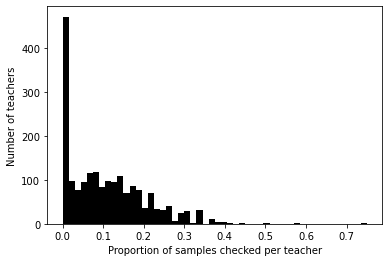

In [13]:
sup_student_ids = list(sup_data['UID'])
n_sup_student_ids = len(sup_student_ids)
assert(len(np.unique(sup_student_ids)) == n_sup_student_ids)

#sup_row_nos_per_teacher = {teacher_id: [] for teacher_id in teacher_ids}
sup_row_nos_per_teacher = {}
n_rows_checked_per_teacher = np.zeros(n_teachers)

for teacher_id in tqdm(teacher_ids): # Iterate over all teachers
    
    #for i in range(n_sup_student_ids): # Iterate over all students checked by supervisors
     #   if sup_student_ids[i] in student_ids_per_teacher[teacher_id]: # This is a student of that teacher_id checked by a supervisor 
      #      sup_row_nos_per_teacher[teacher_id].append(sup_student_ids[i])
            
    sup_row_nos_per_teacher[teacher_id] = [i for i in range(n_sup_student_ids) if sup_student_ids[i] in student_ids_per_teacher[teacher_id]]
    n_rows_checked_per_teacher[list(teacher_ids).index(teacher_id)] = len(sup_row_nos_per_teacher[teacher_id])
        
assert(len(n_rows_checked_per_teacher) == n_teachers)
plt.figure()
plt.hist(np.divide(np.array(n_rows_checked_per_teacher), np.array(n_rows_per_teacher)), 50, color = 'k')
plt.xlabel('Proportion of samples checked per teacher')
plt.ylabel('Number of teachers')

In [29]:
for n_samples in range(1, 21):
    
    print('{0} teachers have at least {1} samples checked'.format(np.sum(n_rows_checked_per_teacher >= n_samples), n_samples))

1544 teachers have at least 1 samples checked
1430 teachers have at least 2 samples checked
1366 teachers have at least 3 samples checked
1290 teachers have at least 4 samples checked
1198 teachers have at least 5 samples checked
1134 teachers have at least 6 samples checked
1057 teachers have at least 7 samples checked
1007 teachers have at least 8 samples checked
936 teachers have at least 9 samples checked
892 teachers have at least 10 samples checked
855 teachers have at least 11 samples checked
805 teachers have at least 12 samples checked
17 teachers have at least 13 samples checked
10 teachers have at least 14 samples checked
9 teachers have at least 15 samples checked
9 teachers have at least 16 samples checked
6 teachers have at least 17 samples checked
4 teachers have at least 18 samples checked
4 teachers have at least 19 samples checked
3 teachers have at least 20 samples checked


## Get Levels and Scores

In [16]:
teacher_constants = ['Subject', 'class']
sup_constants = ['subject', 'class']

teacher_level_variables = ['1st question Level',  '2nd question Level', '3rd question Level', 'baseline']
sup_level_variables = ['1st question Level', '2nd question Level', '3rd question Level', 'baseline']
n_levels = len(teacher_level_variables)
level_values = ['Arumbu', 'Mottu', 'Malar']

teacher_score_variables = ['1st level score', '2nd level score', '3rd level score']
sup_score_variables = ['1st level score', '2nd level score', '3rd level score']
n_scores = len(teacher_score_variables)

print('Checking level data entries for teachers')
for row in tqdm(range(teacher_n_rows)):
    assert(teacher_data['1st question Level'][row] in level_values)
    assert(teacher_data['1st question Level'][row] == teacher_data['baseline'][row]) # 1st level should always correspond to the baseline level.
    for v in ['2nd question Level', '3rd question Level']:
        assert(teacher_data[v][row] in level_values or np.isnan(teacher_data[v][row]))

print('Checking level data entries for supervisors')
for row in tqdm(range(sup_n_rows)):
    assert(sup_data['1st question Level'][row] in level_values)
    assert(sup_data['1st question Level'][row] == sup_data['baseline'][row]) # 1st level should always correspond to the baseline level.
    for v in ['2nd question Level', '3rd question Level']:
        assert(sup_data[v][row] in level_values or np.isnan(sup_data[v][row]))

Checking level data entries for teachers


100%|████████████████████████████████| 166850/166850 [00:08<00:00, 18853.71it/s]


Checking level data entries for supervisors


100%|██████████████████████████████████| 13577/13577 [00:00<00:00, 20055.59it/s]


## Calculate discrepancy

In [34]:
""" 
Condition for mismatch: 
       '1st question level' for that student is NOT matching between the 2 sets 
    OR 1st matches but 2nd doesn't (if it's available in at least one) 
    OR 1st and 2nd matches but 3rd doesn't (if it's available in at least one)

"""

#score_discrepancy = {}
level_discrepancy = {}
n_mismatch = {}

for teacher_id in tqdm(teacher_ids):
    
    row_nos = list(row_nos_per_teacher[teacher_id])
    student_ids = list(student_ids_per_teacher[teacher_id])
    
    sup_row_nos = list(sup_row_nos_per_teacher[teacher_id])
    
    if len(sup_row_nos) > 0: # For this teacher, at least one student has been checked by supervisor
        
        level_disc = np.zeros(len(sup_row_nos), dtype = bool)
        n_mismatch[teacher_id] = 0
        #score_disc = np.zeros(len(sup_row_nos), dtype = bool)
        
        for sup_row in sup_row_nos: # Iterate over students checked by supervisor for this teacher
            
            student_id = sup_student_ids[sup_row]
            teacher_row_no = row_nos[student_ids.index(student_id)]
            
            # Check that subject and class match between the teacher and supervisor
            for c in range(len(teacher_constants)):
                assert(teacher_data[teacher_constants[c]][teacher_row_no] == sup_data[sup_constants[c]][sup_row])
                
            teacher_levels = [teacher_data[v][teacher_row_no] for v in teacher_level_variables]
            teacher_scores = [teacher_data[v][teacher_row_no] for v in teacher_score_variables]
            
            sup_levels = [sup_data[v][sup_row] for v in sup_level_variables]
            sup_scores = [sup_data[v][sup_row] for v in sup_score_variables]
            
            if ~(teacher_levels[0] == sup_levels[0]): 
                # Condition 1: '1st question level' does not match
                level_disc[sup_row_nos.index(sup_row)] = 1
                n_mismatch[teacher_id] += 1
                break
            else:                             
                # '1st question level' matches
                if np.logical_or(~isinstance(teacher_levels[1], str), ~isinstance(sup_levels[1], str)):
                    # '2nd question level' does not exist for either teacher or supervisor
                    break
                else:
                    # '2nd question level' exists for both teacher and supervisor
                    if ~(teacher_levels[1] == sup_levels[1]):
                        # Condition 2: '2nd question level' does not match
                        level_disc[sup_row_nos.index(sup_row)] = 1
                        n_mismatch[teacher_id] += 1
                        break
                    else:
                        # '2nd question level' matches
                        if np.logical_or(~isinstance(teacher_levels[2], str), ~isinstance(sup_levels[2], str)):
                            # '3rd question level' does not exist for either teacher or supervisor
                            break
                        else:
                            # '3rd question level' exists for both teacher and supervisor
                            if ~(teacher_levels[2] == sup_levels[2]):
                                # Condition 3: '3rd question level' does not match
                                level_disc[sup_row_nos.index(sup_row)] = 1
                                n_mismatch[teacher_id] += 1
                
                   
        level_discrepancy[teacher_id] = np.sum(level_disc)/len(sup_row_nos) # Proportion of students checked by supervisor that have a non-matching level


100%|█████████████████████████████████████| 1920/1920 [00:00<00:00, 7713.23it/s]


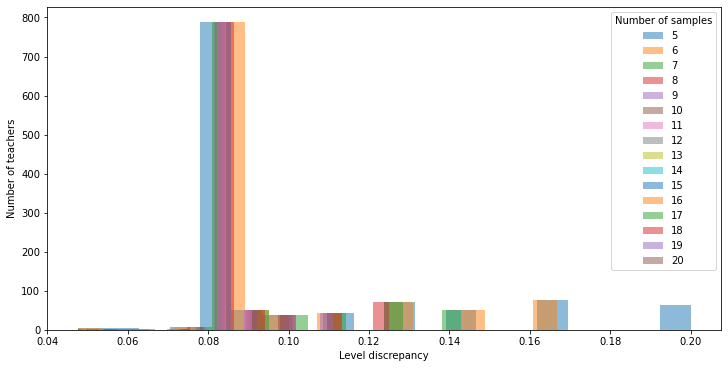

In [33]:
plt.figure(constrained_layout = True, figsize = (10, 5))
for n_samples in range(5, 21):
    
    teacher_ids_selected = [teacher_ids[i] for i in range(n_teachers) if n_rows_checked_per_teacher[i] >= n_samples]
    level_disc = [level_discrepancy[teacher_id] for teacher_id in teacher_ids_selected]
    #score_disc = [score_discrepancy[teacher_id] for teacher_id in teacher_ids_selected]
    #plt.scatter(level_disc, score_disc, marker = 'o', label = n_samples)
    plt.hist(level_disc, 20, alpha = 0.5, label = n_samples)

plt.xlabel('Level discrepancy')
#plt.ylabel('Score discrepancy')
plt.ylabel('Number of teachers')
plt.legend(title = 'Number of samples')

There is exactly 1 mismatch for every teacher: that's very strange.

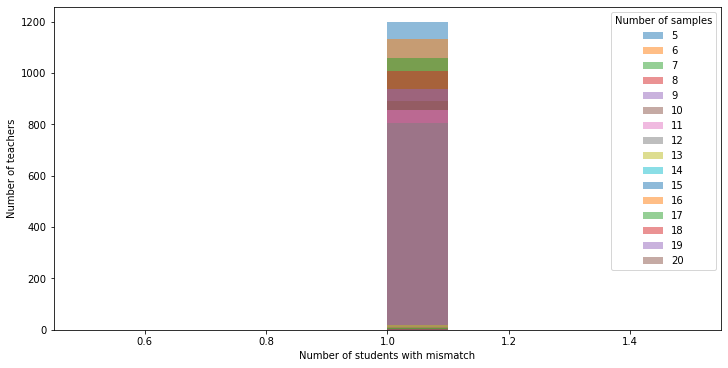

In [35]:
plt.figure(constrained_layout = True, figsize = (10, 5))
for n_samples in range(5, 21):
    
    teacher_ids_selected = [teacher_ids[i] for i in range(n_teachers) if n_rows_checked_per_teacher[i] >= n_samples]
    n = [n_mismatch[teacher_id] for teacher_id in teacher_ids_selected]
    plt.hist(n, alpha = 0.5, label = n_samples)

plt.xlabel('Number of students with mismatch')
plt.ylabel('Number of teachers')
plt.legend(title = 'Number of samples')

In [37]:
n = list(n_mismatch.values())
np.linalg.norm(n - np.ones(len(n)))

0.0

(array([  3.,   1.,   2.,   3.,   0.,   1.,   7.,   0., 788.,  50.]),
 array([0.04761905, 0.05194805, 0.05627706, 0.06060606, 0.06493506,
        0.06926407, 0.07359307, 0.07792208, 0.08225108, 0.08658009,
        0.09090909]),
 <BarContainer object of 10 artists>)

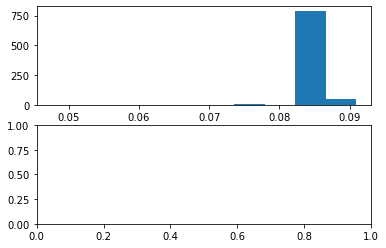

In [38]:
n_samples = 10
teacher_ids_selected = [teacher_ids[i] for i in range(n_teachers) if n_rows_checked_per_teacher[i] > n_samples]
level_disc = [level_discrepancy[teacher_id] for teacher_id in teacher_ids_selected]
#score_disc = [score_discrepancy[teacher_id] for teacher_id in teacher_ids_selected]

fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].hist(level_disc)
#ax[1].hist(score_disc)

In [166]:
for v in teacher_variables:
    print('{0}:{1}'.format(v, teacher_data[v][teacher_row_no]))

identifier:027746153_3
student_id:1027746153
Subject:Tamil
1st question Level:Mottu
1st level score:0
2nd question Level:Malar
2nd level score:0.0
3rd question Level:nan
3rd level score:nan
Cluster ID:33061802506
School ID:33061802503
district:TIRUVANNAMALAI
Teacher User ID:20066393
class:3
baseline:Mottu
Student Identifier:27746153


In [167]:
for v in sup_variables:
    print('{0}:{1}'.format(v, sup_data[v][sup_row]))

UID:027746153_3
district:TIRUVANNAMALAI
block id:115
cluster id:33061802506
Student Identifier:27746153
school id:33061802503
subject:Tamil
class:3
baseline:Arumbu
1st question Level:Arumbu
1st level score:2
2nd question Level:nan
2nd level score:nan
3rd question Level:nan
3rd level score:nan
Admin User ID:30649663
